# Mobile Games A/B Testing

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("D:\Ice\python_udemy\Portfolio Project\Data Game AB test\cookie_cats.csv")

In [3]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


# The AB-test data

In [4]:
#userid - a unique number that identifies each player.
#version - whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40).
#sum_gamerounds - the number of game rounds played by the player during the first 14 days after install.
#retention_1 - did the player come back and play 1 day after installing?
#retention_7 - did the player come back and play 7 days after installing?

In [5]:
# Counting the number of players in each AB group.
df.groupby('version')['userid'].count()

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

# The distribution of game rounds

Text(0, 0.5, 'User Count')

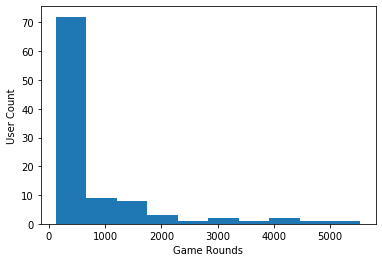

In [6]:
# Counting the number of players for each number of gamerounds 
plot_df = df.groupby('sum_gamerounds')['userid'].count()

# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_df.head(n=100).plot(x="sum_gamerounds", y="userid", kind="hist")
ax.set_xlabel("Game Rounds")
ax.set_ylabel("User Count")

In [7]:
df["retention_1"].isnull().sum()

0

In [8]:
# converted retention_1 column to 1/0
df["retention_1"] = df["retention_1"].astype(int)

In [9]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,False
1,337,gate_30,38,1,False
2,377,gate_40,165,1,False
3,483,gate_40,1,0,False
4,488,gate_40,179,1,True


# Overall 1-day retention

In [10]:
# Calculate overall 1-day retention
df["retention_1"].sum()/df["retention_1"].count()

0.4452095044850259

# 1-day retention by AB-group

In [11]:
# Calculate 1-day retention for each AB-group
df.groupby('version')['retention_1'].sum() / df.groupby('version')['userid'].count()

version
gate_30    0.448188
gate_40    0.442283
dtype: float64

In [12]:
# There was a slight decrease in 1-day retention when the gate was moved to level 40 (44.2%) compared to the control when it was at level 30 (44.8%).

# bootstrapping

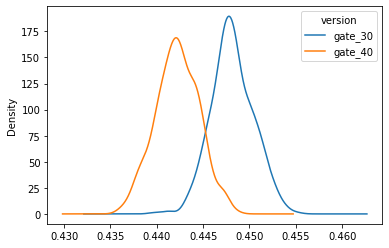

In [13]:
# We will repeatedly re-sample our dataset (with replacement) and calculate 1-day retention for those samples. 
# The variation in 1-day retention will give us an indication of how uncertain the retention numbers are.

boot_1d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='kde')

## Calculate and plot the % difference in 1-day retention between the two AB-groups.

Text(0.5, 0, '% difference in means')

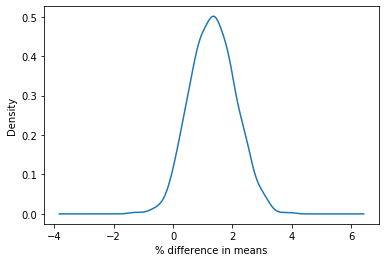

In [14]:
# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = ((boot_1d['gate_30']-boot_1d['gate_40'])/boot_1d['gate_40'])*100

# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot(kind='kde')
ax.set_xlabel("% difference in means")

# The probability of a difference

In [15]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30
# Most of the distribution is above 0%, in favor of a gate at level 30. 
# The probability that the difference is above 0%

prob = (boot_1d['diff']>0).sum()/boot_1d['diff'].count()
"The probability of a difference: {:.1%}".format(prob)

'The probability of a difference: 97.0%'

# 7-day retention by AB-group

In [16]:
# Calculating 7-day retention for both AB-groups

df["retention_7"] = df["retention_7"].astype(int)
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [17]:
df.groupby("version")['retention_7'].sum()/df.groupby("version")['userid'].count()

version
gate_30    0.190201
gate_40    0.182000
dtype: float64

In [18]:
# 7-day retention is slightly lower (18.2%) when the gate is at level 40 than when the gate is at level 30 (19.0%). 
# the overall 7-day retention is lower than the overall 1-day retention; fewer people play a game a week after installing than a day after installing.

# Bootstrapping the difference for 7 day retention

Text(0.5, 0, '% difference in means')

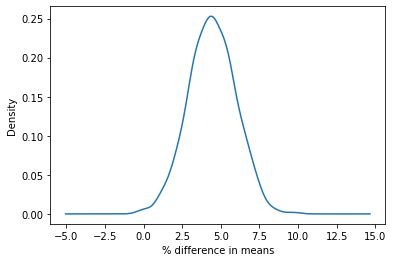

In [19]:
# Creating a list with bootstrapped means for each AB-group
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_7d=pd.DataFrame(boot_7d)

# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] = (boot_7d['gate_30']-boot_7d['gate_40'])/boot_7d['gate_40']*100

# Ploting the bootstrap % difference
ax = boot_7d['diff'].plot(kind='kde')
ax.set_xlabel("% difference in means")


In [20]:
# Calculating the probability that 7-day retention is greater when the gate is at level 30
prob = (boot_7d['diff'] > 0).sum() / len(boot_7d['diff'])

"The probability of a difference: {:.1%}".format(prob)

'The probability of a difference: 99.8%'

# Result

In [21]:
# 1-day and 7-day retention is higher when the gate is at level 30 

In [22]:
# we should not move the gate from level 30 to level 40